In [269]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [270]:
df = pd.read_csv('market_survey.csv')

In [271]:
# Choose only useful columns
base = ['id', 'gender', 'age', 'frequency_of_purchase', 'price_of_snack', 'favorite_snack']
df = df[base]

# remove commas so we can convert the price to float later on
df['price_of_snack'] = df['price_of_snack'].str.replace(',', '')

# lower the case to ensure uniformit
df['gender'] = df['gender'].str.lower()

df['favorite_snack'] = df['favorite_snack'].str.split(',')
 
df.head()

,id,gender,age,frequency_of_purchase,price_of_snack,favorite_snack
0,1,male,28,3,2000.00,"[samosa, chapati, cassava]"
1,2,male,39,3,5500.00,"[bread, rolex, chapati]"
2,3,female,36,3,1000.00,"[chapati, samosa, mandazi]"
3,4,male,43,2,1000.00,"[cassava, chapati]"
4,5,female,23,3,1500.00,[samosa]


In [272]:
df['price_of_snack'] = df.price_of_snack.astype(float)
df.head()

,id,gender,age,frequency_of_purchase,price_of_snack,favorite_snack
0,1,male,28,3,2000.0,"[samosa, chapati, cassava]"
1,2,male,39,3,5500.0,"[bread, rolex, chapati]"
2,3,female,36,3,1000.0,"[chapati, samosa, mandazi]"
3,4,male,43,2,1000.0,"[cassava, chapati]"
4,5,female,23,3,1500.0,[samosa]


In [273]:
age_range = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60']
df.loc[df['age'] <= 10, 'age_group'] = age_range[0]
df.loc[df['age'].between(11,20), 'age_group'] = age_range[1]
df.loc[df['age'].between(21,30), 'age_group'] = age_range[2]
df.loc[df['age'].between(31,40), 'age_group'] = age_range[3]
df.loc[df['age'].between(41,50), 'age_group'] = age_range[4]
df.loc[df['age'].between(51,60), 'age_group'] = age_range[5]

base.append('age_group')

In [274]:
# Q1 -> Total number of respondents
len(df)

171

In [275]:
# Q2 -> Gender distribution of respondents

df.gender.value_counts()

gender
female    89
male      82
Name: count, dtype: int64

<Axes: xlabel='gender'>

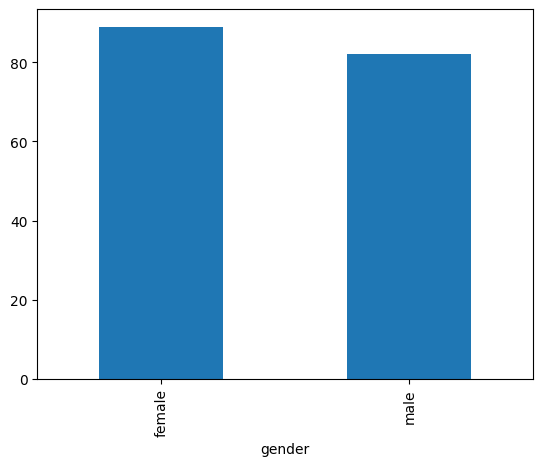

In [276]:
df.gender.value_counts().plot(kind="bar")

In [277]:
# Q3 Respondents by age group

df.age_group.value_counts()

age_group
21-30    78
31-40    37
11-20    34
41-50    12
0-10     10
Name: count, dtype: int64

<Axes: xlabel='age_group'>

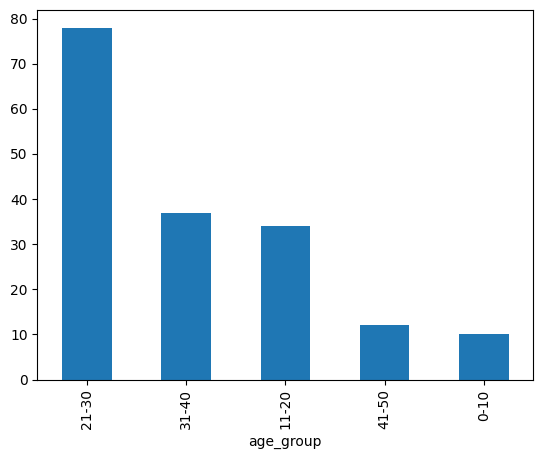

In [278]:
df.age_group.value_counts().plot(kind="bar")

In [279]:
# Q4 Gender distribution of respondents by age group

grouped_gender = df.groupby(['age_group']).gender.value_counts()
unstacked = grouped_gender.unstack()
unstacked

gender,female,male
age_group,,
0-10,6,4
11-20,18,16
21-30,42,36
31-40,20,17
41-50,3,9


<Axes: xlabel='age_group'>

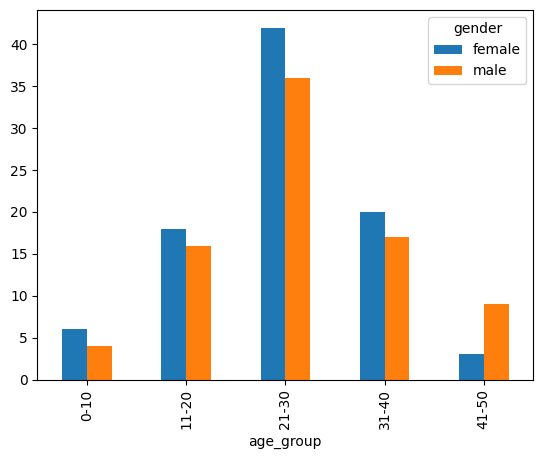

In [280]:
unstacked.plot.bar()

In [281]:
# Q5 Total number of unique snacks
df['favorite_snack'] = df['favorite_snack'].apply(lambda x: [item.strip() for item in x])
snacks_list = set(df['favorite_snack'].explode())
len(snacks_list)

28

In [282]:
snacks_list

{'bans',
 'bread',
 'cake',
 'cakes',
 'cassava',
 'cassava chips',
 'chapati',
 'chips',
 'cookies',
 'corn',
 'crisps',
 'crispy',
 'daddies',
 'doughnuts',
 'egg_roll',
 'eggs',
 'fried_cassava',
 'gonna_crisp',
 'gorrillos',
 'groundnuts',
 'half_cake',
 'kikomando',
 'mandazi',
 'pop_corns',
 'rolex',
 'salty_crisps',
 'samosa',
 'sausages'}

In [283]:
# Q6 Most common snacks eaten by respondents
extra_features = []

for snack in snacks_list:
    df['fav_snack_%s' % snack] = df['favorite_snack'].apply(lambda x: any(snack in item for item in x)).astype(int)
    extra_features.append('fav_snack_%s' % snack)

df_exp = df[base + extra_features]

df_exp.head().T

,0,1,2,3,4
id,1,2,3,4,5
gender,male,male,female,male,female
age,28,39,36,43,23
frequency_of_purchase,3,3,3,2,3
price_of_snack,2000.0,5500.0,1000.0,1000.0,1500.0
favorite_snack,"[samosa, chapati, cassava]","[bread, rolex, chapati]","[chapati, samosa, mandazi]","[cassava, chapati]",[samosa]
age_group,21-30,31-40,31-40,41-50,21-30
fav_snack_chips,0,0,0,0,0
fav_snack_eggs,0,0,0,0,0
fav_snack_bread,0,1,0,0,0


In [284]:
df_exp[extra_features].sum()

fav_snack_chips             6
fav_snack_eggs              1
fav_snack_bread            42
fav_snack_doughnuts         2
fav_snack_sausages          1
fav_snack_mandazi          26
fav_snack_fried_cassava     7
fav_snack_samosa           25
fav_snack_groundnuts        4
fav_snack_cake              4
fav_snack_crisps            2
fav_snack_bans              1
fav_snack_cassava          20
fav_snack_gonna_crisp       1
fav_snack_salty_crisps      1
fav_snack_cassava chips     1
fav_snack_cookies           2
fav_snack_rolex            49
fav_snack_cakes             1
fav_snack_half_cake         1
fav_snack_chapati          65
fav_snack_corn              2
fav_snack_egg_roll          1
fav_snack_daddies           4
fav_snack_gorrillos         1
fav_snack_kikomando         9
fav_snack_crispy            1
fav_snack_pop_corns         1
dtype: int64

In [285]:
# Top 5 snacks among respondents

df_exp[extra_features].sum().sort_values(ascending=False).head(10)

fav_snack_chapati          65
fav_snack_rolex            49
fav_snack_bread            42
fav_snack_mandazi          26
fav_snack_samosa           25
fav_snack_cassava          20
fav_snack_kikomando         9
fav_snack_fried_cassava     7
fav_snack_chips             6
fav_snack_groundnuts        4
dtype: int64

In [307]:
# Q7 Favorite snack per age_group

df_age_group_favorite = df_exp.groupby(['age_group'])[extra_features].sum()
df_age_group_favorite.T

age_group,0-10,11-20,21-30,31-40,41-50
fav_snack_chips,1,0,5,0,0
fav_snack_eggs,0,0,0,1,0
fav_snack_bread,6,8,12,14,2
fav_snack_doughnuts,0,0,1,0,1
fav_snack_sausages,0,0,1,0,0
fav_snack_mandazi,0,11,10,4,1
fav_snack_fried_cassava,0,1,3,3,0
fav_snack_samosa,2,5,14,4,0
fav_snack_groundnuts,0,1,1,2,0
fav_snack_cake,1,0,2,1,0


In [311]:
# Q8 Favorite snack by gender

df_age_group_gen_favorite = df_exp.groupby(['age_group', 'gender'])[extra_features].sum()

df_age_group_gen_favorite.T

age_group                 0-10       11-20       21-30       31-40       \
gender                  female male female male female male female male   
fav_snack_chips              0    1      0    0      4    1      0    0   
fav_snack_eggs               0    0      0    0      0    0      0    1   
fav_snack_bread              5    1      7    1     11    1     10    4   
fav_snack_doughnuts          0    0      0    0      0    1      0    0   
fav_snack_sausages           0    0      0    0      1    0      0    0   
fav_snack_mandazi            0    0      5    6      6    4      2    2   
fav_snack_fried_cassava      0    0      0    1      0    3      2    1   
fav_snack_samosa             0    2      5    0     11    3      3    1   
fav_snack_groundnuts         0    0      1    0      1    0      2    0   
fav_snack_cake               1    0      0    0      1    1      1    0   
fav_snack_crisps             0    0      0    0      2    0      0    0   
fav_snack_bans               0    0      0    0      1    0      0    0   
fav_snack_cassava            0    0      1    3      0   10      2    2   
fav_snack_gonna_crisp        0    0      1    0      0    0      0    0   
fav_snack_salty_crisps       0    0      0    0      1    0      0    0   
fav_snack_cassava chips      0    0      0    0      0    1      0    0   
fav_snack_cookies            0    0      1    0      1    0      0    0   
fav_snack_rolex              0    0      4    5     11   16      1    9   
fav_snack_cakes              0    0      0    0      1    0      0    0   
fav_snack_half_cake          0    0      0    0      0    0      1    0   
fav_snack_chapati            0    2      9    8     15   14      6    6   
fav_snack_corn               0    0      0    0      0    0      2    0   
fav_snack_egg_roll           0    0      0    0      0    0      1    0   
fav_snack_daddies            1    0      1    0      2    0      0    0   
fav_snack_gorrillos          1    0      0    0      0    0      0    0   
fav_snack_kikomando          0    0      0    3      1    5      0    0   
fav_snack_crispy             0    0      1    0      0    0      0    0   
fav_snack_pop_corns          0    0      0    0      0    0      1    0   

age_group                41-50       
gender                  female male  
fav_snack_chips              0    0  
fav_snack_eggs               0    0  
fav_snack_bread              1    1  
fav_snack_doughnuts          1    0  
fav_snack_sausages           0    0  
fav_snack_mandazi            0    1  
fav_snack_fried_cassava      0    0  
fav_snack_samosa             0    0  
fav_snack_groundnuts         0    0  
fav_snack_cake               0    0  
fav_snack_crisps             0    0  
fav_snack_bans               0    0  
fav_snack_cassava            0    2  
fav_snack_gonna_crisp        0    0  
fav_snack_salty_crisps       0    0  
fav_snack_cassava chips      0    0  
fav_snack_cookies            0    0  
fav_snack_rolex              0    3  
fav_snack_cakes              0    0  
fav_snack_half_cake          0    0  
fav_snack_chapati            1    4  
fav_snack_corn               0    0  
fav_snack_egg_roll           0    0  
fav_snack_daddies            0    0  
fav_snack_gorrillos          0    0  
fav_snack_kikomando          0    0  
fav_snack_crispy             0    0  
fav_snack_pop_corns          0    0